# Importing the necessary library to process the Audio files and extract the features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import librosa as lr
import re
from IPython.display import Audio
from scipy.fftpack import fft, rfft
from scipy import stats
from librosa.core import piptrack
from scipy.stats.mstats import gmean
import amfm_decompy.pYAAPT as pYAAPT
import amfm_decompy.basic_tools as basic

# Appending the directories for the audio files in a list, to open them later.

In [2]:
audio_files = glob('..//audios_to_test//*.wav')

In [3]:
audio_files

['..//audios_to_test\\f1.wav',
 '..//audios_to_test\\f11.wav',
 '..//audios_to_test\\f2.wav',
 '..//audios_to_test\\f21.wav',
 '..//audios_to_test\\f3.wav',
 '..//audios_to_test\\f31.wav',
 '..//audios_to_test\\f4.wav',
 '..//audios_to_test\\f41.wav',
 '..//audios_to_test\\f5.wav',
 '..//audios_to_test\\f51.wav',
 '..//audios_to_test\\m1.wav',
 '..//audios_to_test\\m11.wav',
 '..//audios_to_test\\m2.wav',
 '..//audios_to_test\\m21.wav',
 '..//audios_to_test\\m3.wav',
 '..//audios_to_test\\m31.wav',
 '..//audios_to_test\\m4.wav',
 '..//audios_to_test\\m41.wav',
 '..//audios_to_test\\m5.wav',
 '..//audios_to_test\\m51.wav']

In [4]:
audio_files[1]

'..//audios_to_test\\f11.wav'

## Opening the audio files using librosa, the autputs are:
- audio = audio time series
- sampling_rate = sampling rate of audio

In [5]:
# TO open an audio file at a time and listen to it in the notebook

audio, sampling_rate = lr.load(audio_files[5])
Audio(audio, rate=sampling_rate)

## To plot each audio file in the time domain

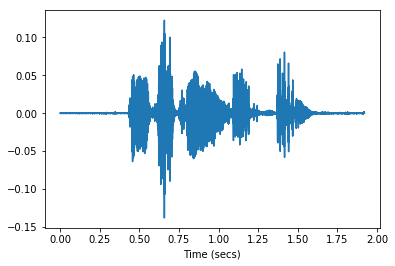

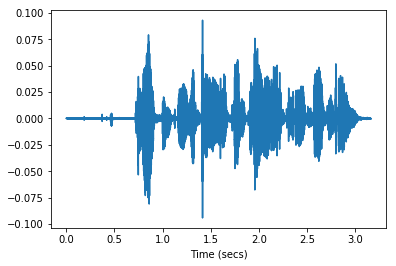

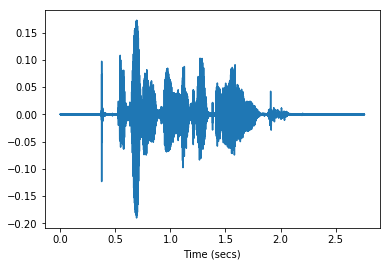

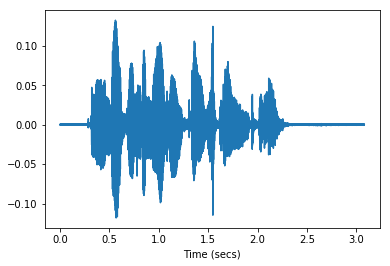

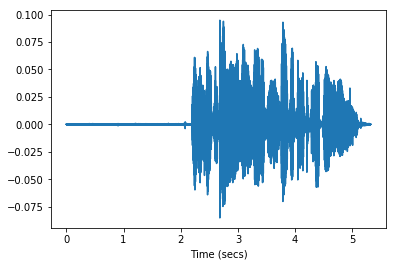

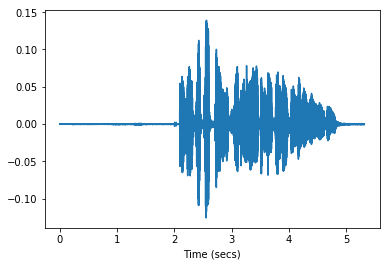

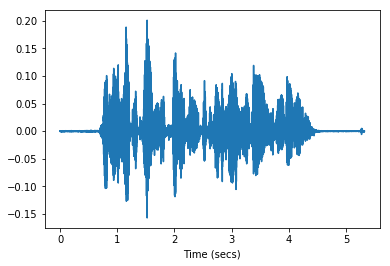

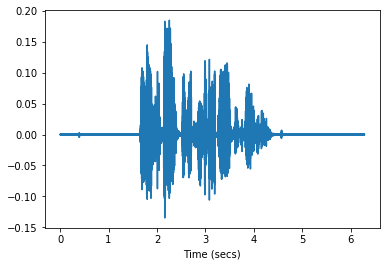

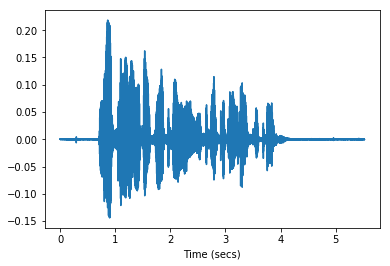

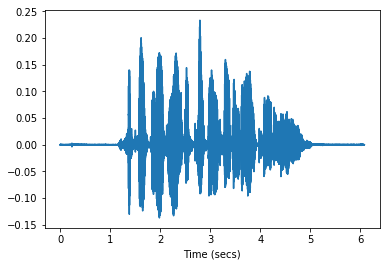

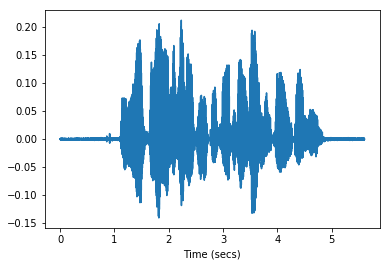

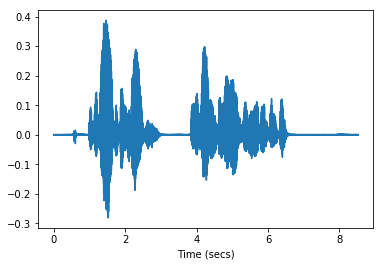

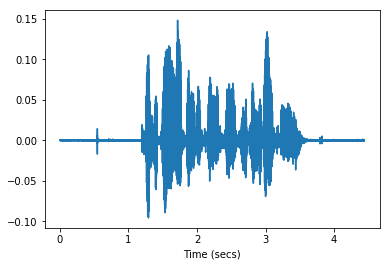

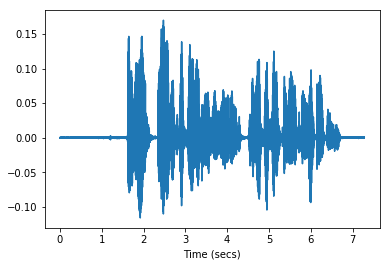

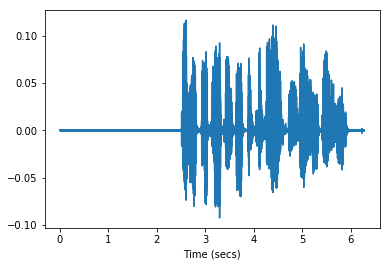

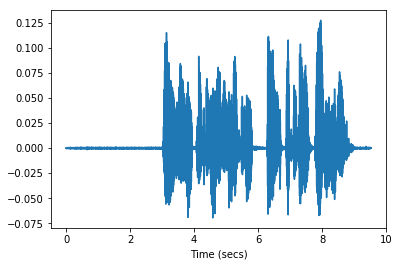

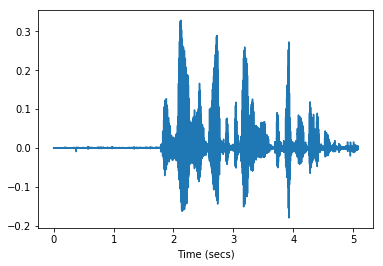

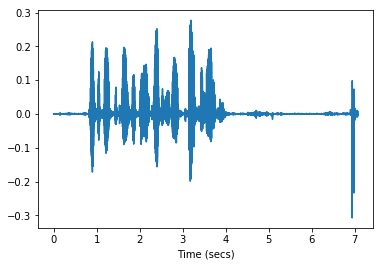

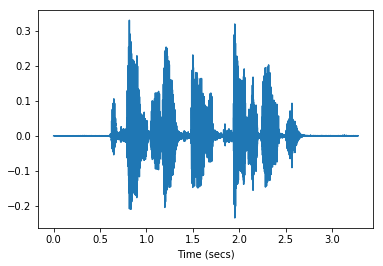

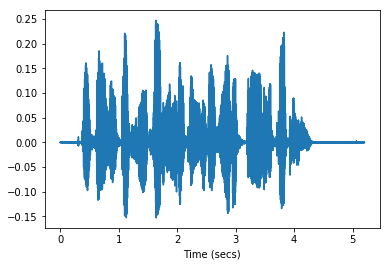

In [6]:
for file in range(0, len(audio_files), 1):
    audio, sampling_rate = lr.load(audio_files[file])
    time = np.arange(0, len(audio)) / sampling_rate
    plt.plot(time, audio)
    plt.xlabel('Time (secs)')
    plt.show()

# Creating a function to extract the features needed out of an Audio file and then append the features into a dictionary

In [76]:
def feature_extractor(audio: np.ndarray, sampling_rate: int) -> dict:
    frequency_spectrum = np.abs(np.fft.rfft(audio))
    frequency = np.fft.rfftfreq(len(audio), d=1 / sampling_rate)
    frequency_spectrum = np.abs(frequency_spectrum)
    amplitude = frequency_spectrum / frequency_spectrum.sum()
    mean_frequency = (frequency * amplitude).sum()
    freq_standerd_deviation = np.sqrt(np.sum(amplitude * ((frequency - mean_frequency) ** 2)))
    amplitude_cumulative_sum = np.cumsum(amplitude)
    median_frequency = frequency[len(amplitude_cumulative_sum[amplitude_cumulative_sum <= 0.5]) + 1]
    mode_frequency = frequency[amplitude.argmax()]
    quartile_25 = frequency[len(amplitude_cumulative_sum[amplitude_cumulative_sum <= 0.25]) + 1]
    quartile_75 = frequency[len(amplitude_cumulative_sum[amplitude_cumulative_sum <= 0.75]) + 1]
    interquartile_range = quartile_75 - quartile_25
    deviation_from_mean = amplitude - amplitude.mean()
    amplitude_std = amplitude.std()
    skewness = ((deviation_from_mean ** 3).sum() / (len(frequency_spectrum) - 1)) / amplitude_std ** 3
    kurtosis = ((deviation_from_mean ** 4).sum() / (len(frequency_spectrum) - 1)) / amplitude_std ** 4
    cent = lr.feature.spectral_centroid(y=audio, sr=sampling_rate)
    #cent = np.sum(frequency_spectrum*frequency) / np.sum(frequency_spectrum)
    spectral_flatness = lr.feature.spectral_flatness(y=audio)
    #spectral_flatness = (gmean(frequency_spectrum * frequency_spectrum))/(np.mean(frequency_spectrum * frequency_spectrum))
    pitches, magnitudes = piptrack(y=audio, sr=sampling_rate, fmax = 280)
    #pitches, magnitudes = piptrack(y=audio, sr=sampling_rate)


    dictionary_of_features = {
        'Mean_freq': mean_frequency/1000,
        'Std': freq_standerd_deviation/1000,
        'Median_freq': median_frequency/1000,
        'Mode_freq': mode_frequency/1000,
        'First_quartile': quartile_25/1000,
        'Third_quartile': quartile_75/1000,
        'Interquantile_range': interquartile_range/1000,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Centroid_freq': np.mean(cent)/1000,
        #'Centroid_freq': cent/1000,
        'Spectral_flatness_measure': np.mean(spectral_flatness),
        #'Spectral_flatness_measure': spectral_flatness
        'Mean_fundamental_freq': (pitches[np.nonzero(pitches)].mean())/1000,
        'Min_fundamental_freq': (pitches[np.nonzero(pitches)].min())/1000,
        'Max_fundamental_freq': (pitches[np.nonzero(pitches)].max())/1000
    }

    return dictionary_of_features

# To open all the audio files, plot the frequency domain of ech file and apply the feature_extractor function to pull the features from the audio files and then append them into a list to use in creating a dataframe later.

### I added a condition to the loop to use the file name and append a new key: values pair in the dictionary, if the file starts with 'f' it appends 1 to a Gender key in the dictionary, if the file starts with anything else 'm', it appends 0 to the Gender key in the dictionary. 

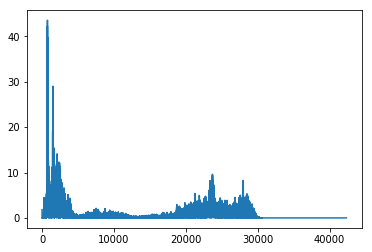

..//audios_to_test\f1.wav
{'Mean_freq': 3.580407955474014, 'Std': 2.8214119061216767, 'Median_freq': 4.322916666666667, 'Mode_freq': 0.19583333333333333, 'First_quartile': 0.5453125, 'Third_quartile': 6.201041666666667, 'Interquantile_range': 5.655729166666667, 'Skewness': 6.608437432396196, 'Kurtosis': 78.82903889264081, 'Centroid_freq': 2.2000534818617883, 'Spectral_flatness_measure': 0.0027645298, 'Mean_fundamental_freq': 0.21117364501953126, 'Min_fundamental_freq': 0.14561262512207032, 'Max_fundamental_freq': 0.28185086059570313, 'Gender': 1}
###########################################################################################################


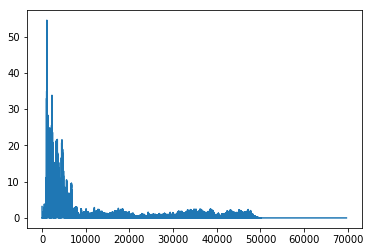

..//audios_to_test\f11.wav
{'Mean_freq': 2.1194696029871567, 'Std': 2.328047013508857, 'Median_freq': 0.7917721518987342, 'Mode_freq': 0.17341772151898732, 'First_quartile': 0.3810126582278481, 'Third_quartile': 3.8034810126582275, 'Interquantile_range': 3.4224683544303796, 'Skewness': 6.445446815306507, 'Kurtosis': 65.00249131575396, 'Centroid_freq': 1.9941091586822446, 'Spectral_flatness_measure': 0.0029732175, 'Mean_fundamental_freq': 0.21403680419921875, 'Min_fundamental_freq': 0.14716944885253908, 'Max_fundamental_freq': 0.28448202514648435, 'Gender': 1}
###########################################################################################################


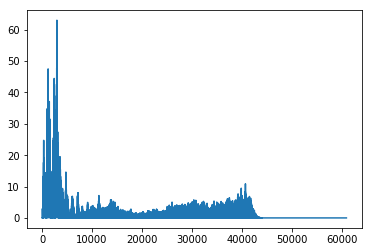

..//audios_to_test\f2.wav
{'Mean_freq': 2.802521139723995, 'Std': 2.6530157612541836, 'Median_freq': 1.59963768115942, 'Mode_freq': 0.5347826086956521, 'First_quartile': 0.46811594202898543, 'Third_quartile': 5.43659420289855, 'Interquantile_range': 4.968478260869565, 'Skewness': 7.3747683050985655, 'Kurtosis': 80.1011050513865, 'Centroid_freq': 2.4545736280437795, 'Spectral_flatness_measure': 0.0028185074, 'Mean_fundamental_freq': 0.21373526000976562, 'Min_fundamental_freq': 0.14602961730957031, 'Max_fundamental_freq': 0.28373922729492185, 'Gender': 1}
###########################################################################################################


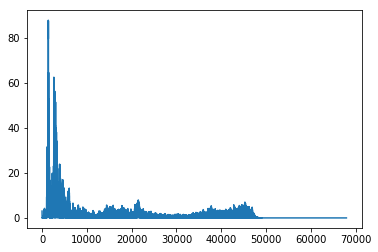

..//audios_to_test\f21.wav
{'Mean_freq': 2.498870953206097, 'Std': 2.4552244304133186, 'Median_freq': 1.2016233766233766, 'Mode_freq': 0.2272727272727273, 'First_quartile': 0.47435064935064936, 'Third_quartile': 3.937337662337662, 'Interquantile_range': 3.462987012987013, 'Skewness': 7.248644736983515, 'Kurtosis': 73.1735079612425, 'Centroid_freq': 2.1056960472015986, 'Spectral_flatness_measure': 0.0020519944, 'Mean_fundamental_freq': 0.21905670166015626, 'Min_fundamental_freq': 0.146625732421875, 'Max_fundamental_freq': 0.2826565856933594, 'Gender': 1}
###########################################################################################################


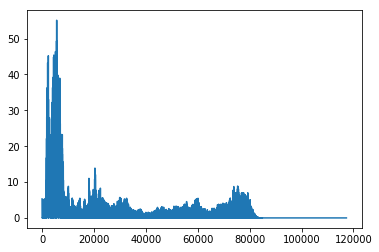

..//audios_to_test\f3.wav
{'Mean_freq': 2.5080547107857365, 'Std': 2.508455224882371, 'Median_freq': 1.1796992481203006, 'Mode_freq': 0.5257518796992481, 'First_quartile': 0.4781954887218045, 'Third_quartile': 4.775375939849624, 'Interquantile_range': 4.2971804511278195, 'Skewness': 5.104057029321761, 'Kurtosis': 35.190929384944575, 'Centroid_freq': 2.246793125734627, 'Spectral_flatness_measure': 0.003738841, 'Mean_fundamental_freq': 0.21111442565917968, 'Min_fundamental_freq': 0.14580442810058594, 'Max_fundamental_freq': 0.28512103271484374, 'Gender': 1}
###########################################################################################################


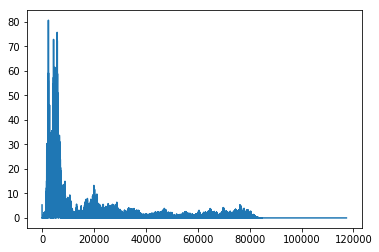

..//audios_to_test\f31.wav
{'Mean_freq': 2.04418373823813, 'Std': 2.214475127719999, 'Median_freq': 0.8073308270676691, 'Mode_freq': 0.22969924812030076, 'First_quartile': 0.4610902255639098, 'Third_quartile': 2.981954887218045, 'Interquantile_range': 2.520864661654135, 'Skewness': 6.629901801537923, 'Kurtosis': 61.17727039308845, 'Centroid_freq': 2.030632556124141, 'Spectral_flatness_measure': 0.00381006, 'Mean_fundamental_freq': 0.21316670227050782, 'Min_fundamental_freq': 0.14562779235839843, 'Max_fundamental_freq': 0.2850431213378906, 'Gender': 1}
###########################################################################################################


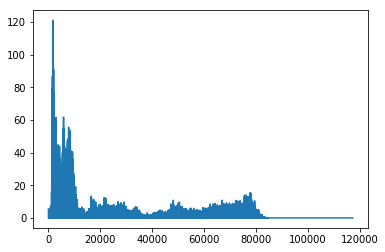

..//audios_to_test\f4.wav
{'Mean_freq': 2.7305675218302996, 'Std': 2.549111317539524, 'Median_freq': 1.5951127819548871, 'Mode_freq': 0.175, 'First_quartile': 0.5571428571428572, 'Third_quartile': 5.0851503759398495, 'Interquantile_range': 4.528007518796993, 'Skewness': 5.551654204291163, 'Kurtosis': 51.93387238627189, 'Centroid_freq': 2.4696244984531877, 'Spectral_flatness_measure': 0.0022906277, 'Mean_fundamental_freq': 0.21339649963378907, 'Min_fundamental_freq': 0.1456434326171875, 'Max_fundamental_freq': 0.28512054443359375, 'Gender': 1}
###########################################################################################################


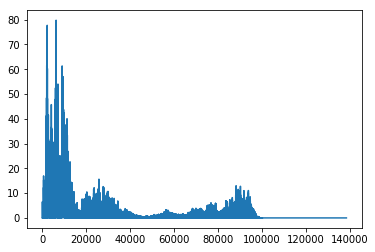

..//audios_to_test\f41.wav
{'Mean_freq': 2.419767605305091, 'Std': 2.5211324541296514, 'Median_freq': 1.0377388535031846, 'Mode_freq': 0.5100318471337579, 'First_quartile': 0.5305732484076433, 'Third_quartile': 4.212420382165605, 'Interquantile_range': 3.6818471337579615, 'Skewness': 5.201807906020913, 'Kurtosis': 40.960358555803545, 'Centroid_freq': 2.465105805251091, 'Spectral_flatness_measure': 0.005384176, 'Mean_fundamental_freq': 0.21079806518554686, 'Min_fundamental_freq': 0.14567544555664064, 'Max_fundamental_freq': 0.2849234008789063, 'Gender': 1}
###########################################################################################################


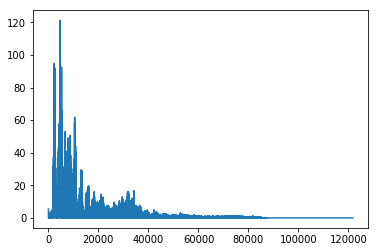

..//audios_to_test\f5.wav
{'Mean_freq': 1.5318591045520573, 'Std': 1.458418027046264, 'Median_freq': 0.9617753623188404, 'Mode_freq': 0.4215579710144927, 'First_quartile': 0.4759057971014492, 'Third_quartile': 2.190579710144927, 'Interquantile_range': 1.7146739130434778, 'Skewness': 5.9843947909205095, 'Kurtosis': 53.75979311784975, 'Centroid_freq': 1.9268742552677682, 'Spectral_flatness_measure': 0.00226516, 'Mean_fundamental_freq': 0.2138319549560547, 'Min_fundamental_freq': 0.1453626708984375, 'Max_fundamental_freq': 0.28491232299804686, 'Gender': 1}
###########################################################################################################


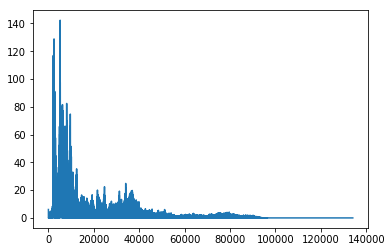

..//audios_to_test\f51.wav
{'Mean_freq': 1.7251215029377762, 'Std': 1.6740392727495925, 'Median_freq': 0.9432565789473685, 'Mode_freq': 0.42828947368421055, 'First_quartile': 0.5113486842105264, 'Third_quartile': 2.653947368421053, 'Interquantile_range': 2.142598684210527, 'Skewness': 5.930367998579431, 'Kurtosis': 54.43195234752486, 'Centroid_freq': 2.371246498391531, 'Spectral_flatness_measure': 0.004266403, 'Mean_fundamental_freq': 0.21062583923339845, 'Min_fundamental_freq': 0.1456663818359375, 'Max_fundamental_freq': 0.28507333374023436, 'Gender': 1}
###########################################################################################################


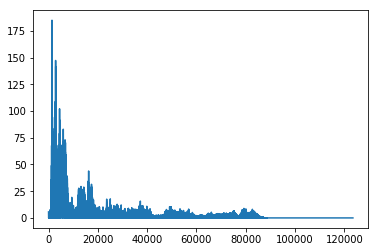

..//audios_to_test\m1.wav
{'Mean_freq': 2.0228443665663183, 'Std': 2.1064444081866527, 'Median_freq': 1.1803571428571427, 'Mode_freq': 0.12517857142857142, 'First_quartile': 0.43660714285714275, 'Third_quartile': 3.1217857142857137, 'Interquantile_range': 2.685178571428571, 'Skewness': 6.936936248973346, 'Kurtosis': 76.6916841428043, 'Centroid_freq': 1.7564685854611102, 'Spectral_flatness_measure': 0.0008747297, 'Mean_fundamental_freq': 0.22153419494628906, 'Min_fundamental_freq': 0.1454282684326172, 'Max_fundamental_freq': 0.28525003051757813, 'Gender': 0}
###########################################################################################################


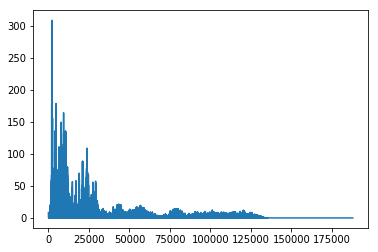

..//audios_to_test\m11.wav
{'Mean_freq': 1.9922351740668205, 'Std': 2.01210611753326, 'Median_freq': 1.2862676056338027, 'Mode_freq': 0.13826291079812209, 'First_quartile': 0.4800469483568075, 'Third_quartile': 2.870892018779343, 'Interquantile_range': 2.390845070422535, 'Skewness': 5.856526343502835, 'Kurtosis': 56.25108297801868, 'Centroid_freq': 2.179427909561115, 'Spectral_flatness_measure': 0.0031649969, 'Mean_fundamental_freq': 0.2203609619140625, 'Min_fundamental_freq': 0.14543890380859376, 'Max_fundamental_freq': 0.2845621337890625, 'Gender': 0}
###########################################################################################################


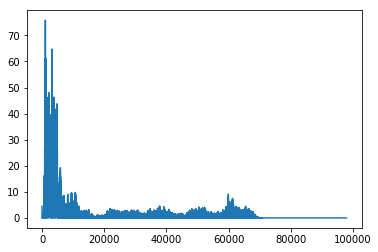

..//audios_to_test\m2.wav
{'Mean_freq': 2.213913277570336, 'Std': 2.4896723418266222, 'Median_freq': 0.6686936936936936, 'Mode_freq': 0.12049549549549547, 'First_quartile': 0.3193693693693693, 'Third_quartile': 4.211486486486486, 'Interquantile_range': 3.8921171171171163, 'Skewness': 6.511926819023207, 'Kurtosis': 57.52891654076215, 'Centroid_freq': 2.2573540932205294, 'Spectral_flatness_measure': 0.0043958384, 'Mean_fundamental_freq': 0.2121944580078125, 'Min_fundamental_freq': 0.14535870361328124, 'Max_fundamental_freq': 0.28515655517578126, 'Gender': 0}
###########################################################################################################


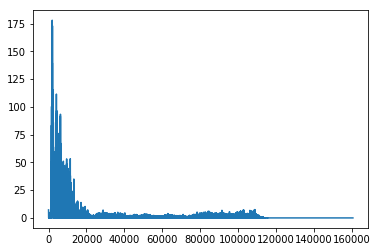

..//audios_to_test\m21.wav
{'Mean_freq': 1.841137103392129, 'Std': 2.3311019004613014, 'Median_freq': 0.6548076923076923, 'Mode_freq': 0.1416208791208791, 'First_quartile': 0.28887362637362635, 'Third_quartile': 2.5163461538461536, 'Interquantile_range': 2.227472527472527, 'Skewness': 7.190153032916238, 'Kurtosis': 79.76372213319061, 'Centroid_freq': 1.8899079232323859, 'Spectral_flatness_measure': 0.003112501, 'Mean_fundamental_freq': 0.21510018920898438, 'Min_fundamental_freq': 0.14548585510253906, 'Max_fundamental_freq': 0.28524163818359377, 'Gender': 0}
###########################################################################################################


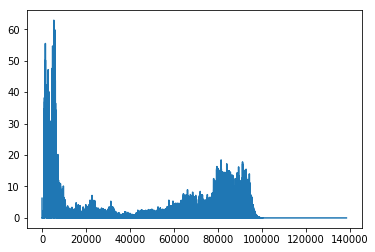

..//audios_to_test\m3.wav
{'Mean_freq': 3.5541575984370066, 'Std': 2.874676971491309, 'Median_freq': 3.8552547770700634, 'Mode_freq': 0.42595541401273884, 'First_quartile': 0.4447452229299363, 'Third_quartile': 6.485509554140127, 'Interquantile_range': 6.040764331210191, 'Skewness': 4.948016330720082, 'Kurtosis': 38.20024319163427, 'Centroid_freq': 2.7809483972998845, 'Spectral_flatness_measure': 0.0046012965, 'Mean_fundamental_freq': 0.21472300720214843, 'Min_fundamental_freq': 0.1453575439453125, 'Max_fundamental_freq': 0.28522845458984375, 'Gender': 0}
###########################################################################################################


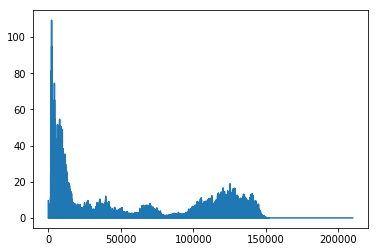

..//audios_to_test\m31.wav
{'Mean_freq': 3.0157199949639573, 'Std': 2.7237150019995577, 'Median_freq': 1.9523109243697478, 'Mode_freq': 0.11953781512605041, 'First_quartile': 0.44821428571428573, 'Third_quartile': 6.004516806722689, 'Interquantile_range': 5.556302521008404, 'Skewness': 5.089346895926883, 'Kurtosis': 43.19783774436792, 'Centroid_freq': 2.6677613431179203, 'Spectral_flatness_measure': 0.0040566484, 'Mean_fundamental_freq': 0.215877197265625, 'Min_fundamental_freq': 0.145458984375, 'Max_fundamental_freq': 0.28517355346679685, 'Gender': 0}
###########################################################################################################


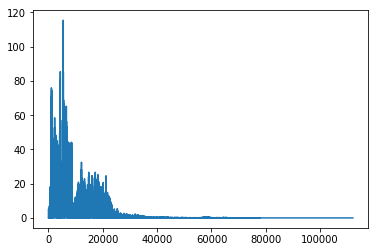

..//audios_to_test\m4.wav
{'Mean_freq': 1.0456631326307246, 'Std': 0.8621978096367011, 'Median_freq': 0.7533464566929133, 'Mode_freq': 0.5397637795275589, 'First_quartile': 0.427755905511811, 'Third_quartile': 1.5438976377952753, 'Interquantile_range': 1.1161417322834646, 'Skewness': 4.955950878233973, 'Kurtosis': 37.69945444980226, 'Centroid_freq': 1.318039824289577, 'Spectral_flatness_measure': 0.0006979606, 'Mean_fundamental_freq': 0.21748066711425781, 'Min_fundamental_freq': 0.1458947296142578, 'Max_fundamental_freq': 0.2851943664550781, 'Gender': 0}
###########################################################################################################


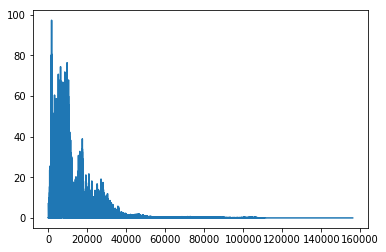

..//audios_to_test\m41.wav
{'Mean_freq': 1.011357711816782, 'Std': 0.9501042140254806, 'Median_freq': 0.6988700564971752, 'Mode_freq': 0.11751412429378531, 'First_quartile': 0.432909604519774, 'Third_quartile': 1.3207627118644067, 'Interquantile_range': 0.8878531073446329, 'Skewness': 4.447911029025846, 'Kurtosis': 27.95607182905823, 'Centroid_freq': 1.3384224136507499, 'Spectral_flatness_measure': 0.0006005949, 'Mean_fundamental_freq': 0.21153669738769532, 'Min_fundamental_freq': 0.14571714782714842, 'Max_fundamental_freq': 0.2849898376464844, 'Gender': 0}
###########################################################################################################


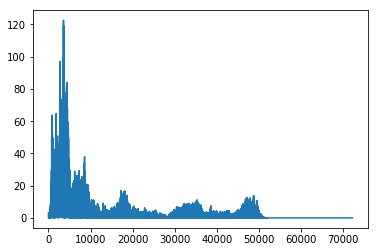

..//audios_to_test\m5.wav
{'Mean_freq': 2.2596012656603963, 'Std': 2.305518458375743, 'Median_freq': 1.1164634146341463, 'Mode_freq': 0.55, 'First_quartile': 0.5411585365853658, 'Third_quartile': 3.517987804878049, 'Interquantile_range': 2.976829268292683, 'Skewness': 4.979920318381361, 'Kurtosis': 37.90056905077212, 'Centroid_freq': 2.4315876707942095, 'Spectral_flatness_measure': 0.0040735863, 'Mean_fundamental_freq': 0.21654527282714844, 'Min_fundamental_freq': 0.14575852966308595, 'Max_fundamental_freq': 0.28443304443359374, 'Gender': 0}
###########################################################################################################


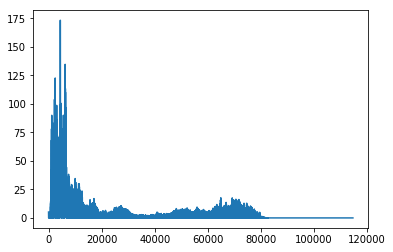

..//audios_to_test\m51.wav
{'Mean_freq': 2.2859059279115073, 'Std': 2.4727717916296736, 'Median_freq': 0.9144230769230768, 'Mode_freq': 0.4261538461538461, 'First_quartile': 0.4298076923076923, 'Third_quartile': 4.531153846153845, 'Interquantile_range': 4.101346153846153, 'Skewness': 5.406641085115678, 'Kurtosis': 42.583161232272666, 'Centroid_freq': 2.1094233078019546, 'Spectral_flatness_measure': 0.0018296157, 'Mean_fundamental_freq': 0.21709922790527345, 'Min_fundamental_freq': 0.14554917907714843, 'Max_fundamental_freq': 0.2849591064453125, 'Gender': 0}
###########################################################################################################


In [77]:
list_of_dict = []
for file in range(0, len(audio_files), 1):
    audio, sampling_rate = lr.load(audio_files[file])
    frequencies = rfft(audio)
    plt.plot(abs(frequencies))
    plt.show()
    print(audio_files[file])
    dictionary_of_features = feature_extractor(audio, sampling_rate)
    #signal = basic.SignalObj(audio_files[file])
    #pitch = pYAAPT.yaapt(signal)
    #dictionary_of_features['Mean_fundamental_freq'] = (np.nanmean(pitch.samp_values))/100
    #dictionary_of_features['Max_fundamental_freq'] = np.nanmax(pitch.samp_values)/1000
    if audio_files[file].startswith('..//audios_to_test\\f'):
        dictionary_of_features['Gender'] = 1
    elif  audio_files[file].startswith('..//audios_to_test\\m'):
        dictionary_of_features['Gender'] = 0
    print(dictionary_of_features)
    list_of_dict.append(dictionary_of_features)
    print('###########################################################################################################')

## Printing the list of dictionaries to make sure that all the dictionaries are in it.

In [78]:
list_of_dict

[{'Mean_freq': 3.580407955474014,
  'Std': 2.8214119061216767,
  'Median_freq': 4.322916666666667,
  'Mode_freq': 0.19583333333333333,
  'First_quartile': 0.5453125,
  'Third_quartile': 6.201041666666667,
  'Interquantile_range': 5.655729166666667,
  'Skewness': 6.608437432396196,
  'Kurtosis': 78.82903889264081,
  'Centroid_freq': 2.2000534818617883,
  'Spectral_flatness_measure': 0.0027645298,
  'Mean_fundamental_freq': 0.21117364501953126,
  'Min_fundamental_freq': 0.14561262512207032,
  'Max_fundamental_freq': 0.28185086059570313,
  'Gender': 1},
 {'Mean_freq': 2.1194696029871567,
  'Std': 2.328047013508857,
  'Median_freq': 0.7917721518987342,
  'Mode_freq': 0.17341772151898732,
  'First_quartile': 0.3810126582278481,
  'Third_quartile': 3.8034810126582275,
  'Interquantile_range': 3.4224683544303796,
  'Skewness': 6.445446815306507,
  'Kurtosis': 65.00249131575396,
  'Centroid_freq': 1.9941091586822446,
  'Spectral_flatness_measure': 0.0029732175,
  'Mean_fundamental_freq': 0.214

## Creating a dataframe for the features extracted from the audio files

In [79]:
new_voices = pd.DataFrame(list_of_dict)

In [80]:
new_voices.head()

,Centroid_freq,First_quartile,Gender,Interquantile_range,Kurtosis,Max_fundamental_freq,Mean_freq,Mean_fundamental_freq,Median_freq,Min_fundamental_freq,Mode_freq,Skewness,Spectral_flatness_measure,Std,Third_quartile
0,2.200053,0.545312,1,5.655729,78.829039,0.281851,3.580408,0.211174,4.322917,0.145613,0.195833,6.608437,0.002765,2.821412,6.201042
1,1.994109,0.381013,1,3.422468,65.002491,0.284482,2.119470,0.214037,0.791772,0.147169,0.173418,6.445447,0.002973,2.328047,3.803481
2,2.454574,0.468116,1,4.968478,80.101105,0.283739,2.802521,0.213735,1.599638,0.146030,0.534783,7.374768,0.002819,2.653016,5.436594
3,2.105696,0.474351,1,3.462987,73.173508,0.282657,2.498871,0.219057,1.201623,0.146626,0.227273,7.248645,0.002052,2.455224,3.937338
4,2.246793,0.478195,1,4.297180,35.190929,0.285121,2.508055,0.211114,1.179699,0.145804,0.525752,5.104057,0.003739,2.508455,4.775376


In [81]:
new_voices.to_csv('..//datasets//voices_to_test.csv', index=False)

# These are some attempts to use differenct functions to extract and plot the fundamental frequencies

In [82]:
# for file in range(0, len(audio_files), 1):
#     signal = basic.SignalObj(audio_files[file])
#     pitch = pYAAPT.yaapt(signal)
#     print(audio_files[file])
#     #print(np.nanmean(pitch.values_interp)/1000)
#     print(np.mean(pitch.values))
#     print(np.mean(pitch.samp_values))
#     print(np.mean(pitch.values_interp))
#     print(np.mean(pitch.samp_interp))
#     fig, ax = plt.subplots(figsize=(12, 8))
#     #ax.plot(pitch.samp_values, label='YAAPT', color='blue')
#     #ax.plot(pitch.samp_interp, label='YAAPT_interpolated', color='red')
#     ax.plot(pitch.values, label='YAAPT', color='blue')
#     ax.plot(pitch.values_interp, label='YAAPT_interpolated', color='red')
#     ax.legend(loc="upper right")
#     plt.show()

In [83]:
# for file in range(0, len(audio_files), 1):
#     audio, sampling_rate = lr.load(audio_files[file])
#     pitches, magnitudes = piptrack(y=audio, sr=sampling_rate, fmax = 280)
#     print(audio_files[file])
#     print(np.mean(pitches))
#     print(np.mean(magnitudes))
#     fig, ax = plt.subplots(figsize=(12, 8))
#     ax.plot(np.nonzero(pitches), label='pitches', color='blue')
#     ax.set_xlim(0, 50)
#     ax.legend(loc="upper right")
#     plt.show()